<a href="https://colab.research.google.com/github/ernese/Deep-Learning-AUT2020/blob/master/(LBP)SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature 
from sklearn import svm 
from sklearn import metrics
%matplotlib inline
import cv2
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [0]:
X_train, y_train = load_mnist('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-1/data', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-1/data', kind='t10k')

labelNames = ["0", "1", "2", "3", "4",
	"5", "6", "7", "8", "9"]

In [0]:
print(np.shape(X_train))
print(np.shape(X_test))

(60000, 784)
(10000, 784)


In [0]:
X_train=X_train.reshape(-1, 28,28).astype('float32') /255
X_test=X_test.reshape(-1, 28,28).astype('float32') /255

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


1
3
6
7
9
8
1
7
9


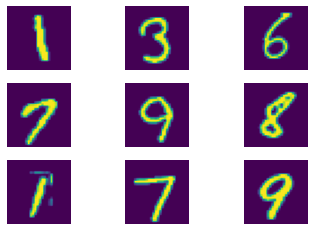

In [0]:
img_index = 6
fig = plt.figure()
ax1 = fig.add_subplot(3,3,1)
ax1.axis('off')
ax1.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(3,3,2)
ax2.axis('off')
img_index = 1320
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(3,3,3)
ax2.axis('off')
img_index = 21234
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(3,3,4)
ax2.axis('off')
img_index = 15
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(3,3,5)
ax2.axis('off')
img_index = 1038
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(3,3,6)
ax2.axis('off')
img_index = 7290
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(3,3,7)
ax2.axis('off')
img_index = 67
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(3,3,8)
ax2.axis('off')
img_index = 8931
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(3,3,9)
ax2.axis('off')
img_index = 47833
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

In [0]:
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
 
	def LBPfeatures(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
    # Form the histogram
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
 
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
 
		# return the histogram of Local Binary Patterns
		return hist

In [0]:
# Create an object of LocalBinaryPatterns class and initial the parameters.
desc = LocalBinaryPatterns(24, 8)
data_train = []
labels_train = []

# loop over the training images
for img_index in range(len(X_train)):
	# load the image, convert it to grayscale, and extract LBP features
	image = (X_train[img_index])
	hist = desc.LBPfeatures(image)
 
	# extract the label from the image path, then update the
	# label and data lists
	labels_train.append(y_train[img_index])
	data_train.append(hist)

In [0]:
model = svm.SVC(kernel='rbf',C=100, random_state=42)
model.fit(data_train, labels_train)

print(np.shape(data_train))
print(np.shape(labels_train))

(60000, 26)
(60000,)


In [0]:
print("Train set Accuracy: {:.2f}".format(model.score(data_train,labels_train)))

Train set Accuracy: 0.51


In [0]:
predictions=[]
predict_label=[]
# Exract LBP features for each test sample and classify it with the trained SVM classifier
for im_index in range(len(X_test)):
  imag = X_test[im_index]
  # Extract LBP feature
  histo = desc.LBPfeatures(imag)
  # Perform classification
  prediction = model.predict(histo.reshape(1, -1))
  # Store the classfication result
  predictions.append(prediction)
  predict_label.append(y_test[im_index])

In [0]:
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.5217


[[ 918    0   11    4    1   25    1    3    2   15]
 [   0 1091    3    0    3    1    1   29    7    0]
 [  21    1  502   86   47   71   50  145   88   21]
 [  31   17  154  276   92  113   36  129  103   59]
 [   7    3  105   22  389   24   44   70   66  252]
 [ 102    9   94   95   84  212   29  161   40   66]
 [  56   14  181   62   59   69  140  115  136  126]
 [  14   56   69   16   68   48   21  688   21   27]
 [  33    3   54   93   70   20   60   32  528   81]
 [  50   14   16   38  205   38   57   51   67  473]]


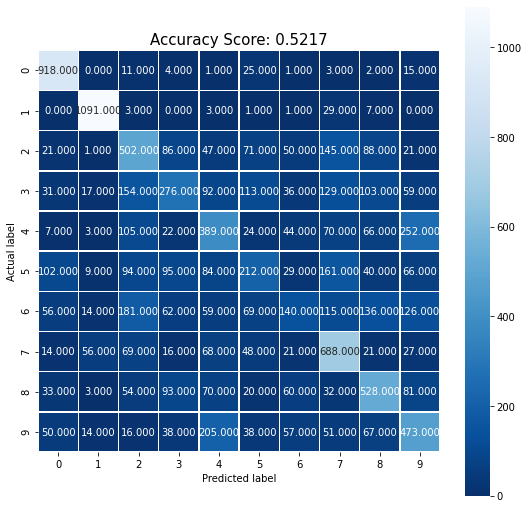

In [0]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test, predictions)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [0]:
# Display the some classification result on test samples
images = []
 
# randomly select a few testing numbers
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the number
  histog = desc.LBPfeatures(X_test[i])
  prediction = model.predict(histog.reshape(1, -1))
  label = labelNames[prediction[0]]
  orig_label=labelNames[y_test[i]]
  image = X_test[i]
  color = (0, 255, 0)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(image)

In [0]:
np.shape(images[1])

(96, 96, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


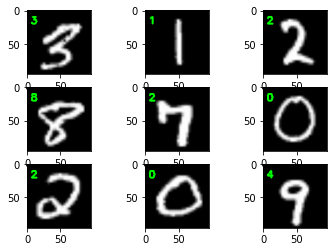

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot(3,3,1)
ax1.imshow(images[1])
print(orig_label[:])
ax2 = fig.add_subplot(3,3,2)
ax2.imshow(images[2])
ax3 = fig.add_subplot(3,3,3)
ax3.imshow(images[3])
ax4 = fig.add_subplot(3,3,4)
ax4.imshow(images[4])
ax5 = fig.add_subplot(3,3,5)
ax5.imshow(images[5])
ax6 = fig.add_subplot(3,3,6)
ax6.imshow(images[6])
ax7 = fig.add_subplot(3,3,7)
ax7.imshow(images[7])
ax8 = fig.add_subplot(3,3,8)
ax8.imshow(images[8])
ax9 = fig.add_subplot(3,3,9)
ax9.imshow(images[9])